In [1]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate sample data
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_test = 0.3 * rng.randn(20, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [3]:
# Fit the model
clf = IsolationForest(contamination=0.1, random_state=rng)
clf.fit(X_train)

IsolationForest(contamination=0.1,
                random_state=RandomState(MT19937) at 0x21915A4A240)

In [4]:
# Predict anomalies
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

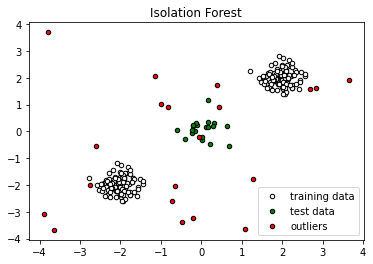

In [5]:
# Plot results
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k', label="training data")
plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k', label="test data")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k', label="outliers")
plt.legend()
plt.title("Isolation Forest")
plt.show()

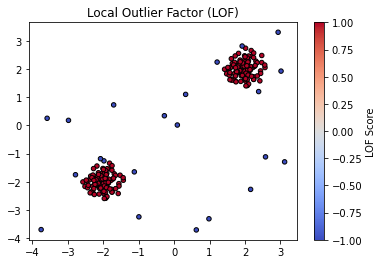

In [6]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

X = np.r_[X_inliers, X_outliers]

# Fit the model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = -clf.negative_outlier_factor_

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=20)
plt.title("Local Outlier Factor (LOF)")
plt.colorbar(label='LOF Score')
plt.show()
